In [2]:
!pip install transformers
!pip install datasets
!pip install huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.9 MB/s eta 0:00:00


In [3]:
import torch
import datasets
import sys

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
from huggingface_hub import list_datasets

dataset_list = list_datasets()

for dataset in dataset_list:
    if 'ko' in dataset.id.lower():
        print(dataset.id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
DQueen/Kokushibo
KomeijiForce/MetaIE-Pretrain
Mabeck/skolegpt_renamed
elenigkove/Email_Intent_Classification
serhii-korobchenko/Shevchenko_rhymed_RU_UKR
Mabeck/skolegpt_shareml
jaban/err_spelling_kor
lemon-mint/korean_reasoning_v0.2
kovuru/1-04-24finaltinyllama
AngelBottomless/Konachan2023
ziozzang/deepl-trans-FR-KO
ziozzang/deepl-trans-ID-KO
ziozzang/deepl-trans-IT-KO
ziozzang/deepl-trans-ES-KO
idiotDeveloper/koreanTelephone
Saxo/ko-naver_review_medi
mncai/ko-rag-chatbot-arena
mncai/ko-chatbot-arena
jeina/korean_image_caption
Koni99/fake-news-testset
kowalsky/test
kms7530/koalphaca-orca-for-solar
juliakharchenko/Collectivist-Individualistic-Values
ShankarSaumil/ArakooAI_Task_Flan-v2
open-llm-leaderboard-old/details_Aratako__Qwen1.5-MoE-2x7B
open-llm-leaderboard-old/details_Aratako__Beyonder-4x7B-random-lora
MohakKhatri/ArakooAI_preprocessed
open-llm-leaderboard-old/details_lemon-mint__gemma-ko-7b-instruct-v0.50
thjeon/Customkor
open-llm-leaderboard-

# 데이터셋 로드

In [5]:
dataset = datasets.load_dataset('nsmc')
print(dataset)

README.md:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

nsmc.py:   0%|          | 0.00/3.18k [00:00<?, ?B/s]

The repository for nsmc contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/nsmc.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/150000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})


In [6]:
import pandas as pd

In [7]:
train_data = pd.DataFrame({"document":dataset['train']['document'], "label":dataset['train']['label'],})
test_data = pd.DataFrame({"document":dataset['test']['document'], "label":dataset['test']['label'],})

In [8]:
print('학습 데이터셋  : {}'.format(len(train_data)))
print(f'테스트 데이터셋  : {len(test_data)}')

학습 데이터셋  : 150000
테스트 데이터셋  : 50000


In [9]:
print(train_data[:5])
print(test_data[:5])

                                            document  label
0                                아 더빙.. 진짜 짜증나네요 목소리      0
1                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2                                  너무재밓었다그래서보는것을추천한다      0
3                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
                                            document  label
0                                                굳 ㅋ      1
1                               GDNTOPCLASSINTHECLUB      0
2             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0


In [10]:
# 데이터 중복을 제외한 갯수 확인
print('학습데이터 :',train_data['document'].nunique(),'라벨 :',train_data['label'].nunique())
print('검증데이터 :',test_data['document'].nunique(),'라벨 :',test_data['label'].nunique())

# 중복제거
train_data.drop_duplicates(subset=['document'], inplace= True)
test_data.drop_duplicates(subset=['document'], inplace= True)
print()

# 갯수 확인
print('학습 데이터셋  : {}'.format(len(train_data)))
print(f'테스트 데이터셋  : {len(test_data)}')

학습데이터 : 146183 라벨 : 2
검증데이터 : 49158 라벨 : 2

학습 데이터셋  : 146183
테스트 데이터셋  : 49158


In [11]:
import numpy as np

train_data['document'].replace('', np.nan, inplace=True)
test_data['document'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how = 'any')
test_data = test_data.dropna(how = 'any')

print('not null 학습 데이터셋  : {}'.format(len(train_data)))
print(f'not null 테스트 데이터셋  : {len(test_data)}')

not null 학습 데이터셋  : 146182
not null 테스트 데이터셋  : 49157


<ipython-input-11-3df53822b7b1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['document'].replace('', np.nan, inplace=True)
<ipython-input-11-3df53822b7b1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

학습 문장 최대 길이 : 146
학습 문장 평균 길이 : 35.981338331668745


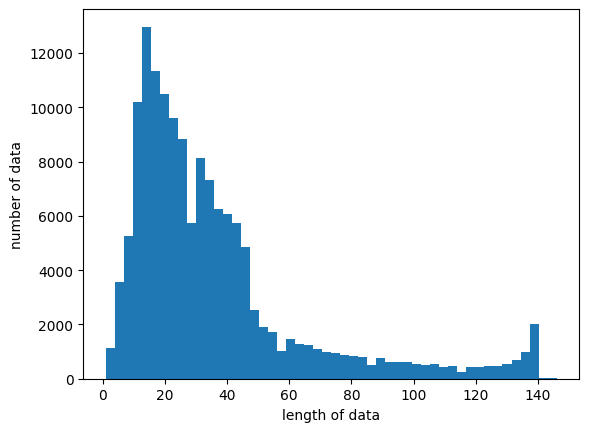

In [12]:
import matplotlib.pyplot as plt

print('학습 문장 최대 길이 :',max(len(l) for l in train_data['document']))
print('학습 문장 평균 길이 :',sum(map(len, train_data['document'])) / len(train_data['document']))

plt.hist([len(s) for s in train_data['document']], bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [13]:
# Pandas DataFrame일 경우
# import pandas as pd
# train_data = pd.DataFrame({'document': ['안녕하세요', '데이터 과학', '자연어 처리']})
# total_length = train_data['document'].apply(len).sum()
# print(total_length)
# apply(len)을 사용하면 각 행의 길이를 계산한 후 합산

# 리스트일 경우
# train_data = {'document': ['안녕하세요', '데이터 과학', '자연어 처리', None]}
# total_length = sum(len(doc) for doc in train_data['document'] if doc is not None)
# print(total_length)
# None 또는 NaN 값이 있을 경우, if doc is not None을 사용

# NumPy 배열일 경우
# import numpy as np
# train_data = np.array(['안녕하세요', '데이터 과학', '자연어 처리'])
# total_length = np.vectorize(len)(train_data).sum()
# print(total_length)

# BERT 모델

In [14]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer

MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [15]:
tokenized_train_sentences = tokenizer(
      list(train_data['document']),
      return_tensors="pt",
      padding=True,
      truncation=True,
      add_special_tokens=True,
)

tokenized_test_sentences = tokenizer(
      list(test_data['document']),
      return_tensors="pt",
      padding=True,
      truncation=True,
      add_special_tokens=True,
)

In [16]:
print(tokenized_train_sentences[0])
print(tokenized_train_sentences[0].tokens)
print(tokenized_train_sentences[0].ids)
print(tokenized_train_sentences[0].attention_mask)

Encoding(num_tokens=142, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [17]:
train_label = train_data['label'].values
test_label = test_data['label'].values

# 데이터셋 클래스 생성

In [18]:
class SingleSentDataset(torch.utils.data.Dataset):
      def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

      def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

      def __len__(self):
            return len(self.labels)

In [19]:
train_dataset = SingleSentDataset(tokenized_train_sentences, train_label)
test_dataset = SingleSentDataset(tokenized_test_sentences, test_label)

# BERT 모델 불러오기

In [20]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

In [21]:
training_args = TrainingArguments(
      output_dir='./results', # 출력물이 저장될 위치
      num_train_epochs=1, # 총 학습할 epoch 수
      per_device_train_batch_size=32, # 학습 배치 크기
      per_device_eval_batch_size=64, # 검증 배치 크기
      warmup_steps=500, # learning rate 범위
      weight_decay=0.01,
      logging_dir='./logs',
      logging_steps=500,
      save_steps=500,
      save_total_limit=2
)

In [23]:
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)
model.to(device)

trainer = Trainer(
      model=model, # the instantiated, Transformers model to be trained
      args=training_args, # training arguments, defined above
      train_dataset=train_dataset, # training dataset
      # compute_metrics= compute_metrics
)
trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jeongrak5 (jeongrak5-not) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<ipython-input-18-f6ca941cfcc1>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss
500,0.548000
1000,0.439300
1500,0.398700
2000,0.384200
2500,0.363000
3000,0.350200
3500,0.345200
4000,0.329200
4500,0.329900


<ipython-input-18-f6ca941cfcc1>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-18-f6ca941cfcc1>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-18-f6ca941cfcc1>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-18-f6ca941cfcc1>:7: UserWarning: To copy construct from a 

TrainOutput(global_step=4569, training_loss=0.3865338432160058, metrics={'train_runtime': 3739.1358, 'train_samples_per_second': 39.095, 'train_steps_per_second': 1.222, 'total_flos': 1.066722312859032e+16, 'train_loss': 0.3865338432160058, 'epoch': 1.0})

# 성능평가

In [24]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
      labels = pred.label_ids
      preds = pred.predictions.argmax(-1)
      precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
      acc = accuracy_score(labels, preds)
      return {
            'accuracy': acc,
            'f1': f1,
            'precision': precision,
            'recall': recall
    }

In [25]:
trainer = Trainer(
      model=model, # the instantiated, Transformers model to be trained
      args=training_args, # training arguments, defined above
      train_dataset=train_dataset, # training dataset
      compute_metrics= compute_metrics
)

In [26]:
trainer.evaluate(eval_dataset=test_dataset)

<ipython-input-18-f6ca941cfcc1>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


{'eval_loss': 0.31679415702819824,
 'eval_model_preparation_time': 0.005,
 'eval_accuracy': 0.8622169782533515,
 'eval_f1': 0.8628253164556962,
 'eval_precision': 0.8636474213428479,
 'eval_recall': 0.8620047752013273,
 'eval_runtime': 331.2307,
 'eval_samples_per_second': 148.407,
 'eval_steps_per_second': 2.322}

In [27]:
# native training using torch

# model = BertForSequenceClassification.from_pretrained(MODEL_NAME)
# model.to(device)
# model.train()

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# optim = AdamW(model.parameters(), lr=5e-5)

# for epoch in range(3):
#   for batch in train_loader:
#     optim.zero_grad()
#     input_ids = batch['input_ids'].to(device)
#     attention_mask = batch['attention_mask'].to(device)
#     labels = batch['labels'].to(device)
#     outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
#     loss=outputs[0]
#     loss.backward()
#     optim.step()

In [32]:
from transformers import pipeline

sentence_classif = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, device=0)

print(sentence_classif(f'영화 개재미있어 ㅋㅋㅋㅋㅋㅋ'))
print(sentence_classif(f'진짜 재미없네요 ㅋㅋㅋ'))
print(sentence_classif(f'너 때문에 진짜 짜증나'))
print(sentence_classif(f'재미있고 좋았어요'))


Device set to use cuda:0


[{'label': 'LABEL_1', 'score': 0.9325935244560242}]
[{'label': 'LABEL_0', 'score': 0.9927957653999329}]
[{'label': 'LABEL_0', 'score': 0.9935396313667297}]
[{'label': 'LABEL_1', 'score': 0.9910854697227478}]


In [33]:
def sentences_predict(sent):
      model.eval()
      tokenized_sent = tokenizer(
            sent,
            return_tensors="pt",
            truncation=True,
            add_special_tokens=True,
            max_length=128
      )
      tokenized_sent.to(device)

      with torch.no_grad():# 그라디엔트 계산 비활성화
            outputs = model( # **tokenized_sent
            input_ids=tokenized_sent['input_ids'],
            attention_mask=tokenized_sent['attention_mask'],
            token_type_ids=tokenized_sent['token_type_ids']
      )

      logits = outputs[0]
      logits = logits.detach().cpu().numpy()
      result = np.argmax(logits)
      return result

In [35]:
print(sentences_predict('영화 개재미있어 ㅋㅋㅋㅋㅋㅋ'))
print(sentences_predict('진짜 재미없네요 ㅋㅋㅋ'))
print(sentences_predict('너 때문에 진짜 짜증나'))
print(sentences_predict('재미있고 좋았어요'))

1
0
0
1
